In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\Users\devan\AppData\Local\Temp\ipykernel_8760\1659832598.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Read the data
data = pd.read_csv('DATASET.CSV')

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [3]:
# Step 5: Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed.drop('MI', axis=1))  


In [4]:
# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data_imputed['MI'], test_size=0.2, random_state=42)

In [5]:
# Step 7: Model training
logreg = LogisticRegression()
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10)  # Adjust hyperparameters
gradient_boost = GradientBoostingClassifier(n_estimators=100, max_depth=3)  # Adjust hyperparameters
k_neighbors = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth
svm = SVC(C=1.0)  # Adjust C for regularization

In [6]:
# Train the models
logreg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boost.fit(X_train, y_train)
k_neighbors.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [7]:
# Step 8: Model evaluation

models = [logreg, naive_bayes, random_forest, gradient_boost, k_neighbors, decision_tree, svm]

for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on training data
    train_predictions = model.predict(X_train)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    
    # Make predictions on test data
    test_predictions = model.predict(X_test)
    
    # Calculate testing accuracy
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Generate classification report for test data
    test_report = classification_report(y_test, test_predictions)
    
    print(f"{model.__class__.__name__} Train Accuracy: {train_accuracy}")
    print(f"{model.__class__.__name__} Test Accuracy: {test_accuracy}")
    print(f"Classification Report for {model.__class__.__name__}:\n{test_report}\n")



LogisticRegression Train Accuracy: 0.9569517161140197
LogisticRegression Test Accuracy: 0.9465116279069767
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       188
         1.0       0.98      0.97      0.98       104
         2.0       0.90      0.94      0.92       138

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430


GaussianNB Train Accuracy: 0.8987783595113438
GaussianNB Test Accuracy: 0.8976744186046511
Classification Report for GaussianNB:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       188
         1.0       0.95      1.00      0.97       104
         2.0       0.89      0.78      0.83       138

    accuracy                           0.90       430
   macro avg       0.90      0.90      0.90       430
weighted a

In [8]:
# Step 9: Ensemble - Voting Classifier
# Define the VotingClassifier with specified estimators
voting_classifier = VotingClassifier(estimators=[('lr', logreg), ('nb', naive_bayes), 
                                                 ('rf', random_forest), ('gb', gradient_boost),
                                                 ('knn', k_neighbors), ('dt', decision_tree), ('svm', svm)],
                                     voting='hard')

# Train the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on training data
train_predictions_voting = voting_classifier.predict(X_train)

# Calculate training accuracy
train_accuracy_voting = accuracy_score(y_train, train_predictions_voting)

# Make predictions on test data
test_predictions_voting = voting_classifier.predict(X_test)

# Calculate testing accuracy
test_accuracy_voting = accuracy_score(y_test, test_predictions_voting)

# Generate classification report for test data
test_report_voting = classification_report(y_test, test_predictions_voting)

print(f"Voting Classifier Train Accuracy: {train_accuracy_voting}")
print(f"Voting Classifier Test Accuracy: {test_accuracy_voting}")
print(f"Classification Report for Voting Classifier:\n{test_report_voting}")

Voting Classifier Train Accuracy: 0.9691681210005817
Voting Classifier Test Accuracy: 0.9627906976744186
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       188
         1.0       1.00      0.98      0.99       104
         2.0       0.92      0.96      0.94       138

    accuracy                           0.96       430
   macro avg       0.97      0.97      0.97       430
weighted avg       0.96      0.96      0.96       430



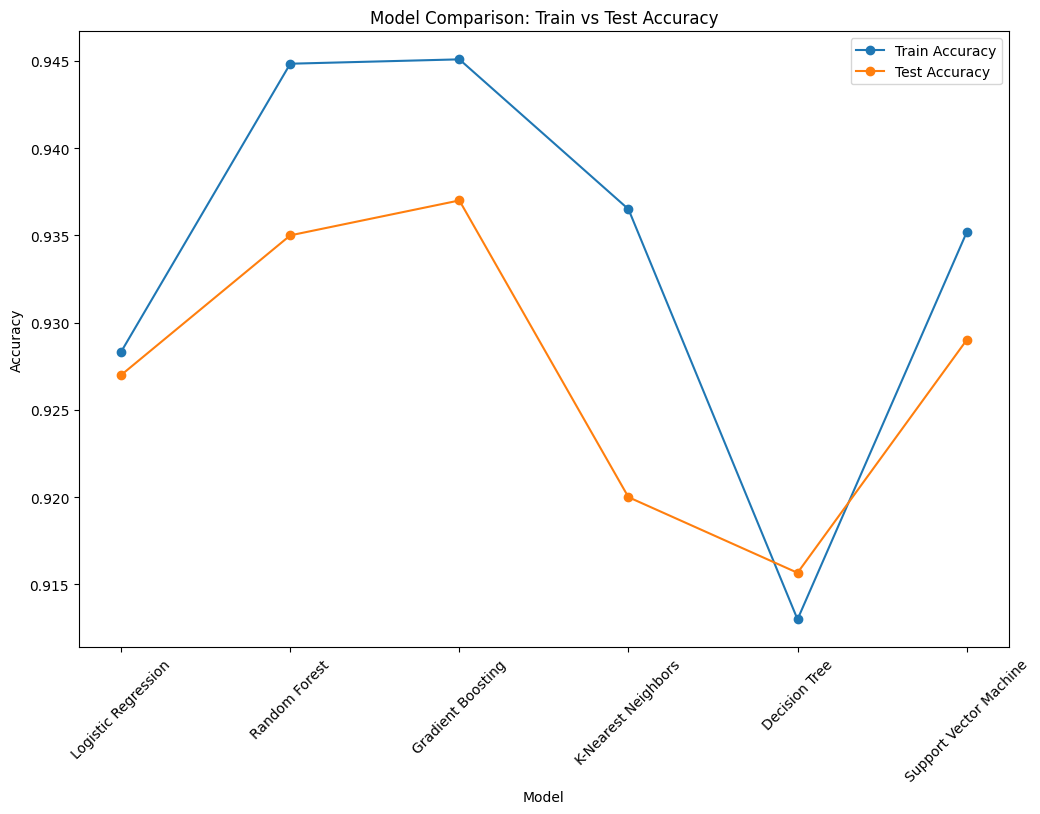

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a folder to save graphs if it doesn't exist
os.makedirs("graph_comparison", exist_ok=True)

# Read the data
data = pd.read_csv('heart_data_cleaned_synthetic.csv')

# Check for missing values and impute using mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed.drop('MI', axis=1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data_imputed['MI'], test_size=0.2, random_state=42)

# Model initialization
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=3),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Support Vector Machine': SVC(C=1.0)
}

# Train and evaluate models
model_results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on training and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    # Store results for visualization
    model_results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame from model results
results_df = pd.DataFrame(model_results)

# Plotting linear graph for Train and Test Accuracy
plt.figure(figsize=(12, 8))

# Plot train accuracy
plt.plot(results_df['Model'], results_df['Train Accuracy'], marker='o', label='Train Accuracy')

# Plot test accuracy
plt.plot(results_df['Model'], results_df['Test Accuracy'], marker='o', label='Test Accuracy')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Train vs Test Accuracy')
plt.xticks(rotation=45)
plt.legend()

# Save the plot to a file in the specified folder
plt.savefig('graph_comparison/model_accuracy_line_graph.png')

# Show the plot
plt.show()
